<a href="https://colab.research.google.com/github/cyk0810/nvidia/blob/main/yolov8_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # YOLOv8 설치
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
# 필요한 라이브러리 임포트
import os
from ultralytics import YOLO
import shutil
from google.colab import drive
from google.colab import files


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# 파일 선택기를 통한 업로드
uploaded = files.upload()

Saving Test.v1i.yolov8-obb.zip to Test.v1i.yolov8-obb.zip


In [4]:
!mkdir -p /content/dataset

# 압축 해제
!unzip -q /content/Test.v2i.yolov8.zip -d /content/dataset

unzip:  cannot find or open /content/Test.v2i.yolov8.zip, /content/Test.v2i.yolov8.zip.zip or /content/Test.v2i.yolov8.zip.ZIP.


In [5]:
# 대상 디렉토리 생성
!mkdir -p /content/dataset/test/images

# 모든 파일 복사
!cp /content/dataset/train/images/* /content/dataset/test/images/

In [6]:
# 대상 디렉토리 생성
!mkdir -p /content/dataset/valid/images

# 모든 파일 복사
!cp /content/dataset/train/images/* /content/dataset/valid/images/

In [7]:
!mkdir -p /content/dataset/valid/labels

# 모든 파일 복사
!cp /content/dataset/train/images/* /content/dataset/valid/labels/

# data.yaml 파일수정
train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images


In [8]:
from ultralytics import YOLO
# Try a smaller model like yolov8s-seg.pt or yolov8m-seg.pt
# We will try yolov8m-seg.pt as a balance between size and performance
model = YOLO('yolov8l-seg.pt')

# Continue with the training parameters, you might need to adjust batch size further
# or reduce imgsz if memory errors persist even with a smaller model.
results = model.train(
    data='/content/dataset/data.yaml',  # 데이터셋 설정 파일
    epochs=50,               # 학습 에폭 수
    imgsz=640,               # 이미지 크기 (consider reducing if still out of memory)
    batch=8,                # 배치 크기 (consider reducing further if still out of memory)
    name='yolov8_seg_custom',    # 프로젝트 이름
    project='/content/runs/train',    # 저장 경로
    patience=0,             # Early stopping patience
    save=True,               # 체크포인트 저장
    device=0                 # GPU 사용
)

100%|██████████| 88.1M/88.1M [00:00<00:00, 332MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_seg_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=0, perspective=0.0, plots=True, pose=12.0, pr

100%|██████████| 755k/755k [00:00<00:00, 112MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              


  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 252MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 537.1±185.7 MB/s, size: 21.8 KB)


train: Scanning /content/dataset/train/labels... 15 images, 0 backgrounds, 11 corrupt: 100%|██████████| 15/15 [00:00<00:00, 819.35it/s]

train: /content/dataset/train/images/100-_jpg.rf.0d165df03e37a55b43bbbed27aba97f1.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0182]
train: /content/dataset/train/images/101-_jpg.rf.a9d0c19df357245ce9af5ffab8f460a0.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0293]
train: /content/dataset/train/images/102-_jpg.rf.1cb0367b8bffad7a6bb230e994447c26.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0332]
train: /content/dataset/train/images/103-_jpg.rf.f6abfb3a3c78101f4f4cfd9821d4de9d.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0059]
train: /content/dataset/train/images/104-_jpg.rf.ab51f79eeb7447ac3b8ffa5e281f3111.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0133]
train: /content/dataset/train/images/91-_jpg.rf.4053f2277f332d6b034fc0167158610d.jpg: ignoring corrupt image/label: non-norma

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 361.8±264.3 MB/s, size: 21.8 KB)


val: Scanning /content/dataset/valid/labels... 0 images, 15 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 73071.50it/s]

WARNING ⚠️ val: No labels found in /content/dataset/valid/labels.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: New cache created: /content/dataset/valid/labels.cache
WARNING ⚠️ Labels are missing or empty in /content/dataset/valid/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to /content/runs/train/yolov8_seg_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 106 weight(decay=0.0), 117 weight(decay=0.0005), 116 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/train/yolov8_seg_custom
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.22G      2.154      4.898      3.637      1.914        105        640: 100%|██████████| 1/1 [00:04<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.36G       2.08       5.09      3.533      1.952         61        640: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.37G      2.047      5.229      3.634          2         56        640: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.39G      1.973      5.116      3.469      1.908         73        640: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.41G      2.256      4.846      3.732      2.153         49        640: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.42G      2.083      6.059      3.549      2.026         64        640: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.44G      2.109      4.579      3.665      1.938         69        640: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.46G      2.241      5.878      3.465      2.187         76        640: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.54G      2.231      4.109      2.914      1.996         64        640: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.92G      2.083      5.137       2.91       2.04         71        640: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.95G      1.642      3.618      2.608      1.668         57        640: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.73G      1.772      3.646      2.787      1.796         60        640: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.76G      1.722      3.419      2.362      1.641         68        640: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.83G      1.645      3.327      1.812       1.55         78        640: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.86G      1.195      3.139      1.645      1.443         60        640: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.64G      1.494      3.207      1.907      1.608         57        640: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.67G      1.368      2.786      1.574      1.329         84        640: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.31G      1.321       3.11      1.695      1.438         66        640: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.31G      1.269      2.517      1.412      1.417         69        640: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.31G      1.379      2.519      1.628      1.482         60        640: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.31G      1.163      2.654      1.398      1.238        101        640: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.66G      1.148      2.746      1.271      1.294         74        640: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.69G      1.096      2.972        1.7      1.322         56        640: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.47G      1.126      2.083      1.301      1.234         85        640: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.52G      1.027      2.126      1.268      1.227         69        640: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.55G      1.187      2.863      1.556      1.266         69        640: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.33G       1.27      2.359      1.587      1.303         74        640: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.38G      1.212      2.617       1.62      1.295         78        640: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.41G        1.1      2.072      1.279      1.255         83        640: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.19G      1.321      2.922      1.619      1.378         56        640: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.24G      1.144      2.462      1.336      1.315         63        640: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.27G      1.026      2.305      1.108      1.168         81        640: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.71G      1.074      2.409       1.14      1.156         93        640: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.12G      1.031      2.139      1.143      1.269         64        640: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.12G      0.937      2.131      1.175       1.23         71        640: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.12G      1.013      2.259      1.188      1.169         79        640: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.13G       1.24      2.595      1.396      1.433         49        640: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.18G     0.9335      2.544      1.246      1.197         46        640: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.21G     0.9212      2.094     0.9132      1.076         81        640: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.28G       1.14      2.332      1.221      1.259         90        640: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.33G      1.273      2.221       1.37      1.377         39        640: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.38G      1.091      2.023      1.147      1.335         39        640: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.41G     0.8395      1.699      1.084      1.151         38        640: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.48G     0.9476      1.797      1.029      1.163         36        640: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.57G     0.8862      1.756     0.9545        1.2         39        640: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.12G      0.831      1.625       1.02      1.176         38        640: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.15G      0.987      1.584     0.8892      1.142         36        640: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.76G      0.764      1.696     0.8961      1.097         38        640: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.76G     0.6651      1.532     0.8953      1.082         38        640: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.76G      0.903      1.596     0.9082      1.171         38        640: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:730: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



50 epochs completed in 0.088 hours.
Optimizer stripped from /content/runs/train/yolov8_seg_custom/weights/last.pt, 92.3MB
Optimizer stripped from /content/runs/train/yolov8_seg_custom/weights/best.pt, 92.3MB

Validating /content/runs/train/yolov8_seg_custom/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-seg summary (fused): 125 layers, 45,915,743 parameters, 0 gradients, 220.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:548: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:593: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:593: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/l

                   all         15          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels
Speed: 0.2ms preprocess, 20.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/runs/train/yolov8_seg_custom


In [9]:
# 학습된 모델 로드(폴더에 맞도록)
model = YOLO('/content/runs/train/yolov8_seg_custom/weights/best.pt')

# 테스트 실행
results = model.predict(
    source='/content/dataset/test/images',  # 테스트 이미지 경로
    save=True,                              # 결과 저장
    save_txt=True,                          # 텍스트 결과도 저장
    conf=0.5,                               # 신뢰도 임계값
    project='/content/runs/detect',         # 저장 프로젝트 경로
    name='test_results'                     # 폴더 이름 지정
)


image 1/15 /content/dataset/test/images/100-_jpg.rf.0d165df03e37a55b43bbbed27aba97f1.jpg: 640x640 4 dotted-lines, 1 left_lane, 1 right_line, 74.4ms
image 2/15 /content/dataset/test/images/101-_jpg.rf.a9d0c19df357245ce9af5ffab8f460a0.jpg: 640x640 4 dotted-lines, 1 left_lane, 1 left_line, 1 right_lane, 1 right_line, 43.5ms
image 3/15 /content/dataset/test/images/102-_jpg.rf.1cb0367b8bffad7a6bb230e994447c26.jpg: 640x640 3 dotted-lines, 1 left_lane, 1 right_line, 45.0ms
image 4/15 /content/dataset/test/images/103-_jpg.rf.f6abfb3a3c78101f4f4cfd9821d4de9d.jpg: 640x640 5 dotted-lines, 1 left_lane, 2 left_lines, 1 right_lane, 1 right_line, 44.1ms
image 5/15 /content/dataset/test/images/104-_jpg.rf.ab51f79eeb7447ac3b8ffa5e281f3111.jpg: 640x640 4 dotted-lines, 2 left_lanes, 1 right_line, 44.9ms
image 6/15 /content/dataset/test/images/105-_jpg.rf.3fb029d1a064288065834c51b9aadfbb.jpg: 640x640 4 dotted-lines, 2 left_lanes, 2 left_lines, 1 right_lane, 1 right_line, 38.4ms
image 7/15 /content/datase

In [10]:
import cv2

def draw_enhanced_results(image_path, results):
    """세그멘테이션 마스크를 이미지 위에 시각화"""
    # 이미지 로드
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 클래스 색상 정의
    class_names = ['dotted-line', 'left_lane', 'left_line', 'right_lane', 'right_line']
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255)]

    for result in results:
        masks = result.masks  # 마스크 객체

        if masks is not None and masks.data is not None:
            mask_data = masks.data.cpu().numpy()  # (N, H, W)
            cls_list = result.boxes.cls.cpu().numpy().astype(int)  # 클래스 인덱스 리스트
            conf_list = result.boxes.conf.cpu().numpy()  # 신뢰도

            for i in range(len(mask_data)):
                mask = mask_data[i]
                cls_id = cls_list[i]
                conf = conf_list[i]

                # 마스크 색상 및 클래스 이름
                color = colors[cls_id % len(colors)]
                class_name = class_names[cls_id] if cls_id < len(class_names) else f'class_{cls_id}'
                label = f'{class_name}: {conf:.2f}'

                # 마스크를 컬러로 적용
                colored_mask = np.zeros_like(img_rgb, dtype=np.uint8)
                for c in range(3):
                    colored_mask[:, :, c] = mask * color[c]

                # 반투명하게 overlay
                img_rgb = cv2.addWeighted(img_rgb, 1.0, colored_mask, 0.4, 0)

                # 마스크 경계 추출하여 텍스트 위치 추정
                contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                if contours:
                    x, y, w, h = cv2.boundingRect(contours[0])
                    # 라벨 텍스트
                    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
                    cv2.rectangle(img_rgb, (x, y - text_height - 10), (x + text_width, y), color, -1)
                    cv2.putText(img_rgb, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    return img_rgb


Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


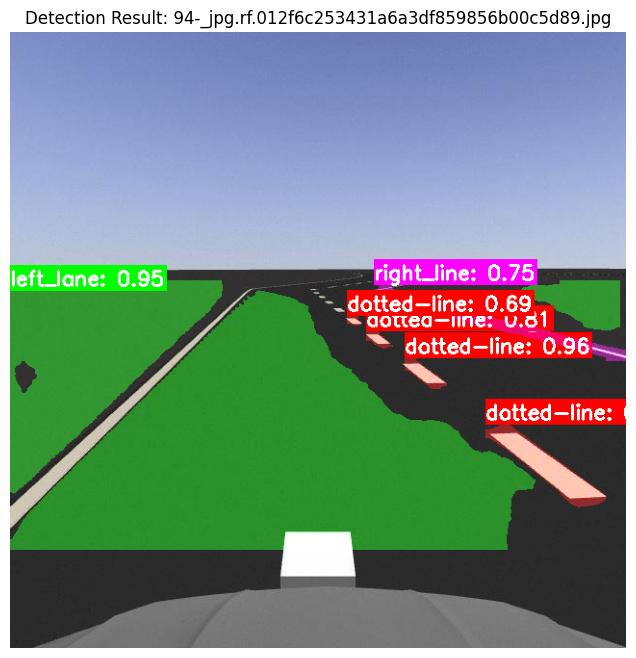

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


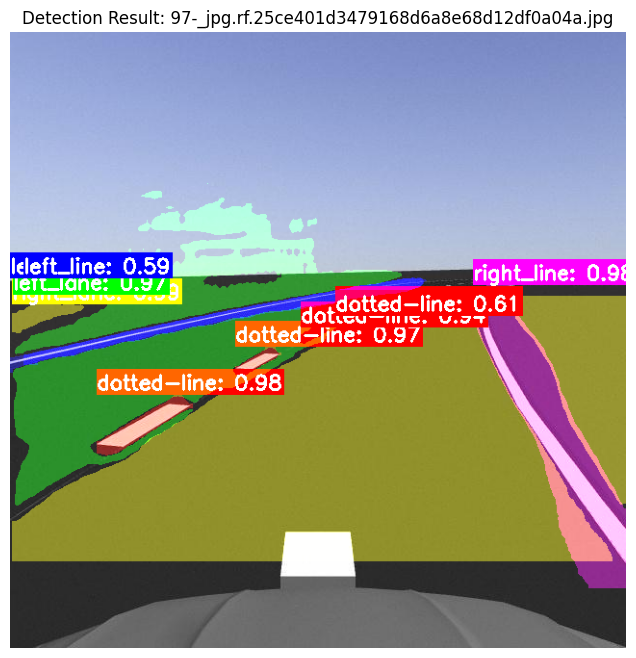

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


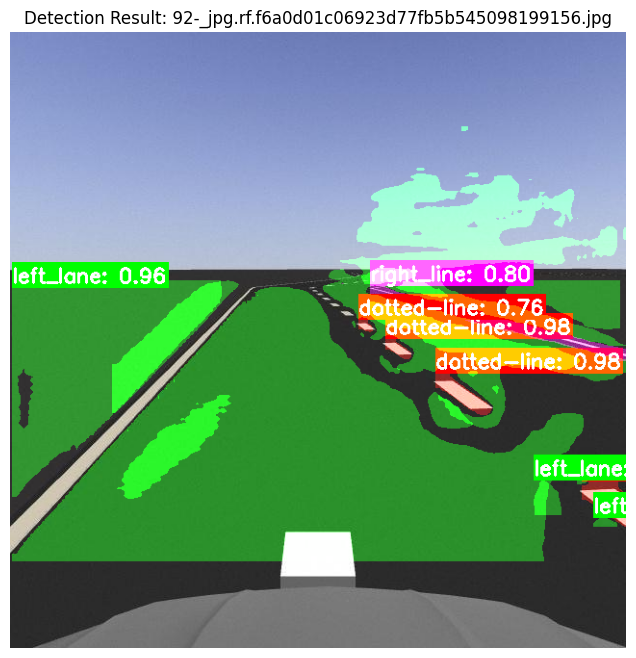

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


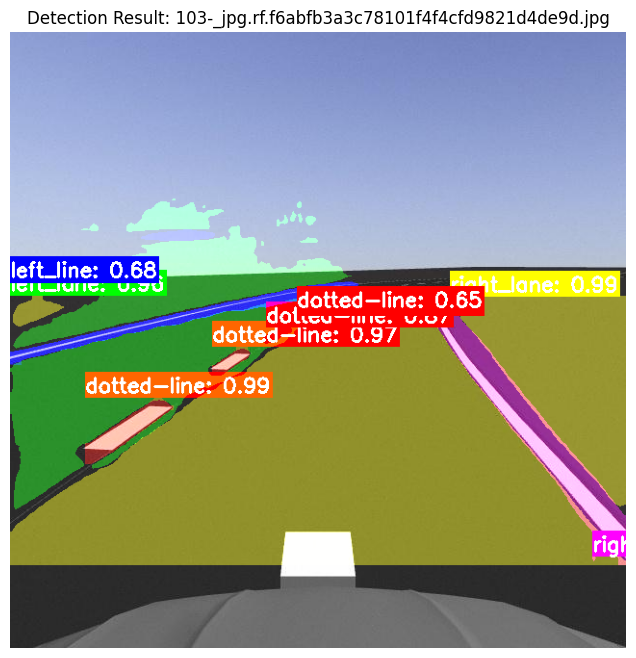

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


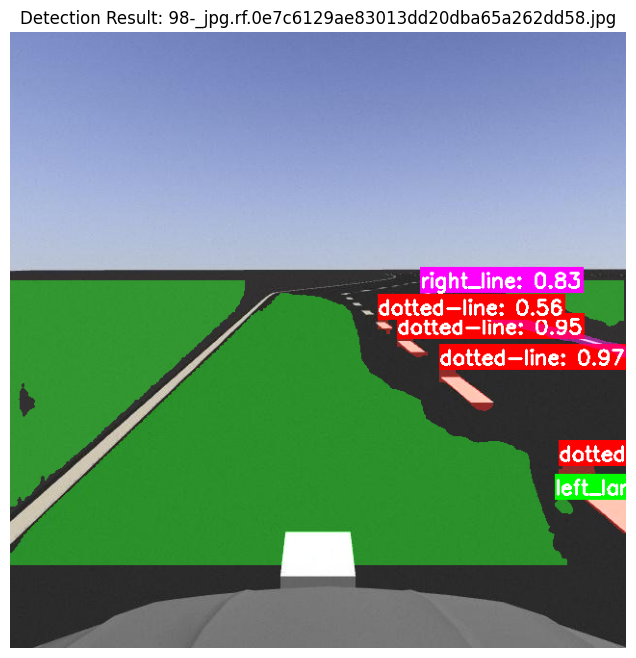

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


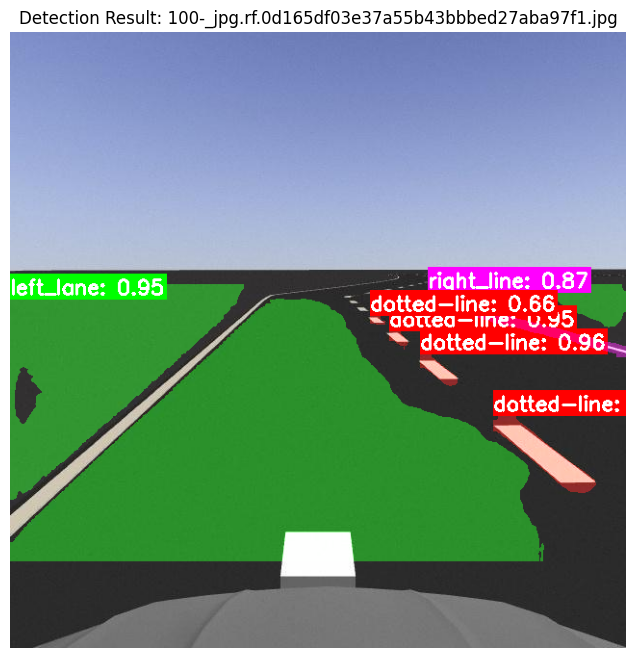

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


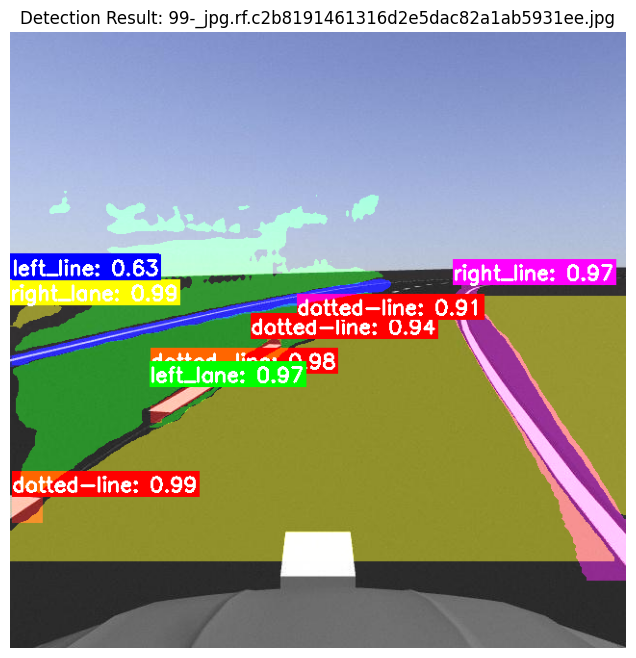

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


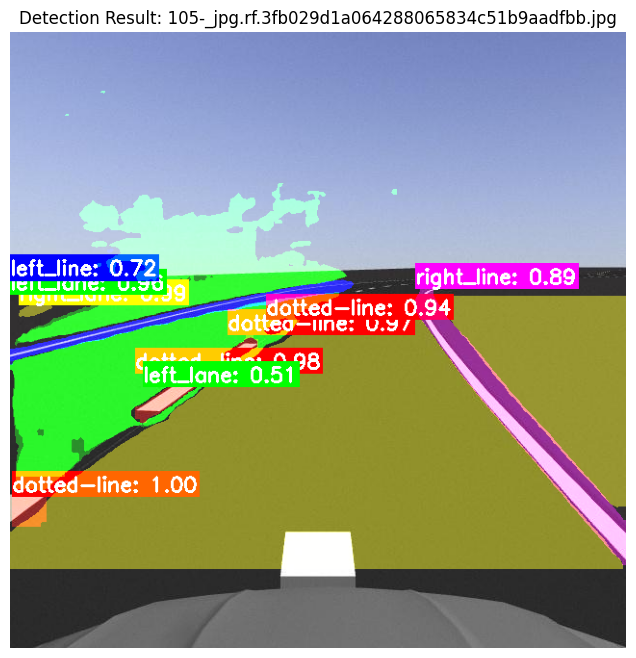

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


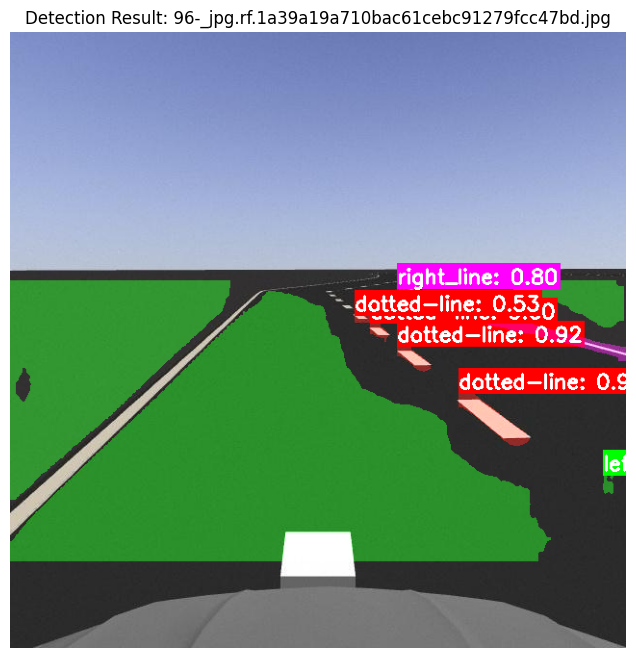

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


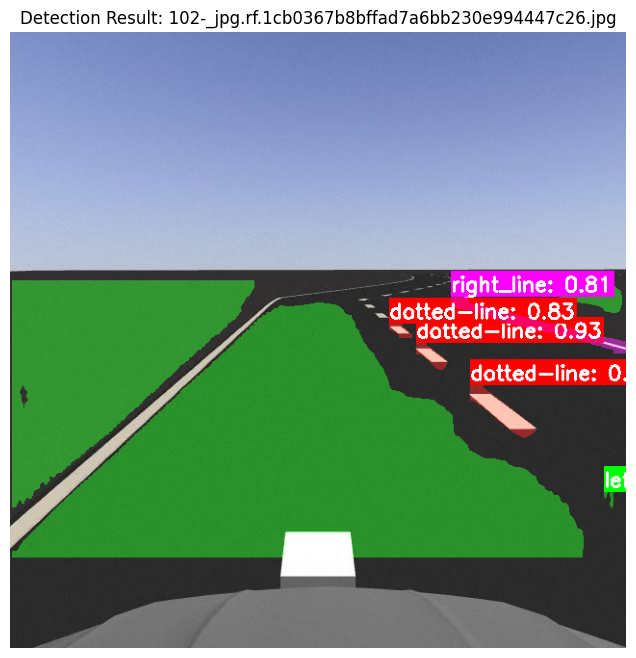

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


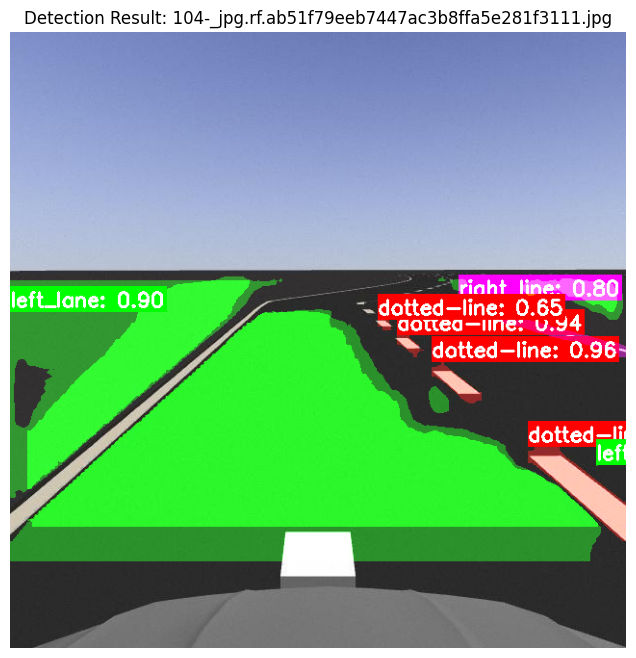

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


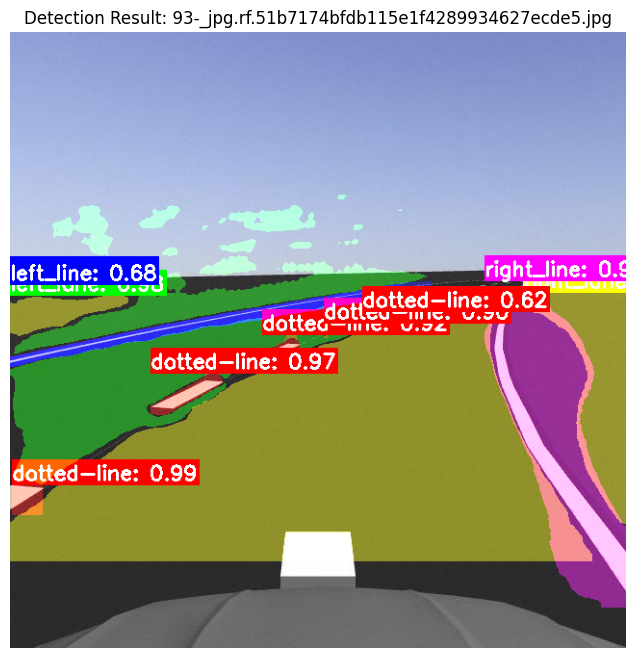

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


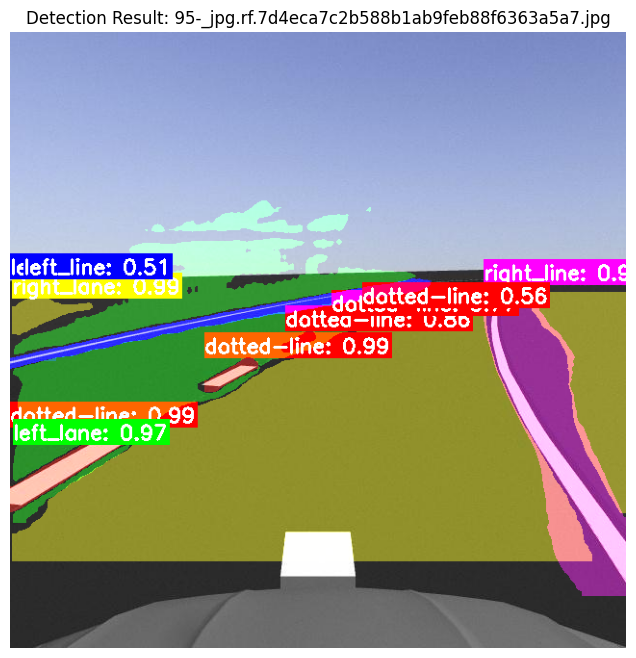

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


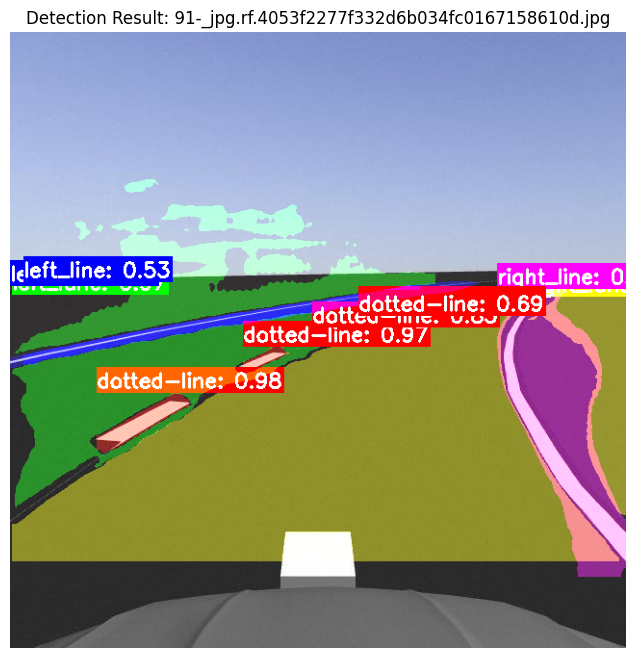

Results saved to /content/runs/detect/test_results
15 labels saved to /content/runs/detect/test_results/labels


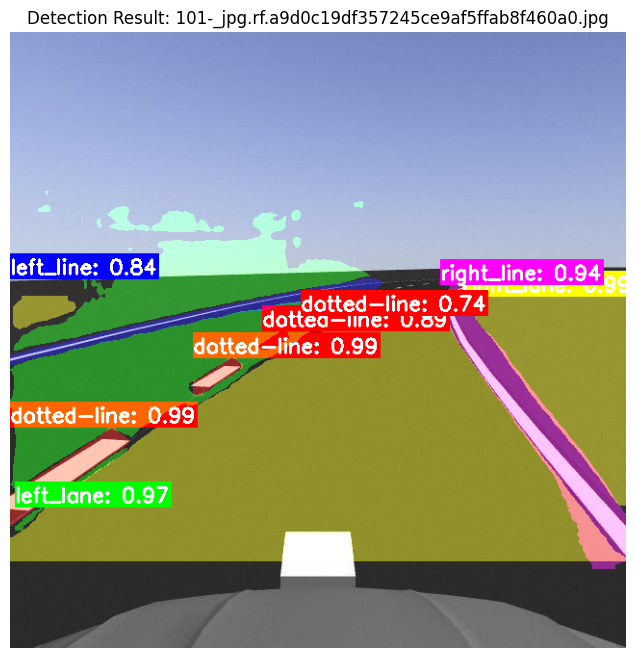

In [11]:
import matplotlib.pyplot as plt
import numpy as np # numpy를 np로 import 합니다.
import os # os 모듈을 임포트합니다.

# 테스트 이미지 디렉토리의 파일 목록을 가져옵니다.
test_images_dir = '/content/dataset/test/images/'
test_images = os.listdir(test_images_dir)
# 파일 이름만 가져오므로, 전체 경로를 사용할 때는 디렉토리 경로를 다시 붙여야 합니다.

for i, img_name in enumerate(test_images[:15]):  # 15개
    img_path = os.path.join(test_images_dir, img_name) # 이미지 파일의 전체 경로를 생성합니다.

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 향상된 시각화
    enhanced_img = draw_enhanced_results(img_path, result)

    # 결과 표시
    plt.figure(figsize=(12, 8))
    plt.imshow(enhanced_img)
    plt.title(f'Detection Result: {img_name}')
    plt.axis('off')
    plt.show()

In [14]:
import shutil
from google.colab import files

# 1. zip 파일로 압축 (기존 zip 파일이 있다면 덮어씌움)
shutil.make_archive('/content/runs_backup', 'zip', '/content/runs')

# 2. 다운로드 링크 제공
files.download('/content/runs_backup.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#동영상으로 만들기

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# YOLO 예측 + 시각화 함수 (콜라보용)
image_dir = '/content/dataset/test/images/'
test_images = sorted([img for img in os.listdir(image_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))])

frames = []

for i, img_name in enumerate(test_images[:5]):  # 처음 5개만
    img_path = os.path.join(image_dir, img_name)

    # 예측 실행
    result = model.predict(img_path, conf=0.5, verbose=False)

    # 향상된 시각화
    enhanced_img = draw_enhanced_results(img_path, result)

    # RGB -> BGR (OpenCV용)
    bgr_img = cv2.cvtColor(np.array(enhanced_img), cv2.COLOR_RGB2BGR)

    # 모든 프레임 사이즈를 동일하게 유지
    bgr_img = cv2.resize(bgr_img, (1280, 720))

    frames.append(bgr_img)

# 🔄 동영상 생성
video_path = "/content/detection_results.mp4"
fps = 2  # 0.5초 간격 = 2프레임/초
height, width, _ = frames[0].shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 코덱 설정

out = cv2.VideoWriter(video_path, fourcc, fps, (width, height))

for frame in frames:
    out.write(frame)

out.release()
print(f"✅ 영상 저장 완료: {video_path}")

# Colab에서 다운로드 링크 제공
from google.colab import files
files.download(video_path)


Results saved to /content/runs/detect/test_results4
15 labels saved to /content/runs/detect/test_results4/labels
Results saved to /content/runs/detect/test_results4
15 labels saved to /content/runs/detect/test_results4/labels
Results saved to /content/runs/detect/test_results4
15 labels saved to /content/runs/detect/test_results4/labels
Results saved to /content/runs/detect/test_results4
15 labels saved to /content/runs/detect/test_results4/labels
Results saved to /content/runs/detect/test_results4
15 labels saved to /content/runs/detect/test_results4/labels
✅ 영상 저장 완료: /content/detection_results.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>